<a href="https://colab.research.google.com/github/younhuiji/openCV/blob/main/%5B1%5DCNN%E1%84%8B%E1%85%B5%E1%84%8C%E1%85%B5%E1%86%AB%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%8B%E1%85%AD%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 규제화 함수**

1)  임의로 모델 복잡도를 제한 시키는 방법

2) L1,L2 ,엘라시틱넷(ElasticNet), 가중치 감쇠 (Weight Decay)라고 한다. 3) 가중치의 합을 구하여 손실 함수를 더해준다.

    \tensorflow.keras.regularizers.l1(l=0.01): 가중치 절대값합(라쏘)
    tensorflow.keras.regularizers.l2(l=0.01): 가중치 제곱값합(릿지)
    tensorflow.keras.regularizers.l1_l2(l1=0.01,l2=0.01): 가중치 절대값합(라쏘) + 가중치 제곱값합(릿지) = (엘라스틱넷)\
   
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))

**2. 드롭아웃**

  1)  학습이 진행되는 동안 신경망의 일부 유팃을 제외 (드롭)
  2)  테스트 시에는 드롭아웃이 작동되지 않고 모든 유닛이 활성화 되는 대신, 출력 값을 드롭아웃 비율만큼 줄여준다. 3) 0.2~ 0.5 사용 model.add(Dropout(0.2))

**3. 배치 정규화**

 1) 그래디언트 손실/ 폭발 없이 높은 학습률을 사용할 수 있음

 2) 신경망층의 출력값은 다양한 입력 데이터에 따라 쉽게 변할수 있는데, 매우 큰 범위의 출력 값은 신경망을 불안정하게 할 수 있어 범위를 제한 시켜 불확실성을 감소 시킨다.

 3) Dense or Conv2D ->BatchNormalization()-> Activation()

    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu')) model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))


## [2] CNN 이진 분류 모형 확인

### 데이터 다운로드

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \-O /content/cats_and_dogs_filtered.zip

--2023-09-21 03:06:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.207, 173.194.74.207, 142.250.152.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   221MB/s    in 0.3s    

2023-09-21 03:06:28 (221 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### 이미지 데이터 경로 설정

In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/content/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

In [ ]:
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#기본경로
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
print(train_dir)          # /content/cats_and_dogs_filtered/train
print(validation_dir)     # /content/cats_and_dogs_filtered/validation

/content/cats_and_dogs_filtered/train
/content/cats_and_dogs_filtered/validation


In [ ]:
# 훈련에 사용되는 개, 고양이 디렉토리 경로
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
print(train_cats_dir)         #/content/cats_and_dogs_filtered/train/cats
print(train_dogs_dir)         #/content/cats_and_dogs_filtered/train/dogs

/content/cats_and_dogs_filtered/train/cats
/content/cats_and_dogs_filtered/train/dogs


In [ ]:
# 검증에 사용되는 개 고양이 폴더 경로
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
print(validation_cats_dir)      # /content/cats_and_dogs_filtered/validation/cats
print(validation_dogs_dir)      # /content/cats_and_dogs_filtered/validation/dogs

/content/cats_and_dogs_filtered/validation/cats
/content/cats_and_dogs_filtered/validation/dogs


In [ ]:
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)

print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])

['cat.275.jpg', 'cat.261.jpg', 'cat.239.jpg', 'cat.97.jpg', 'cat.812.jpg']
['dog.880.jpg', 'dog.768.jpg', 'dog.782.jpg', 'dog.142.jpg', 'dog.64.jpg']


In [ ]:
print("학습용 고양이 사진의 수:",len(train_cats_fnames))
print("학습용 강아지 사진의 수:",len(train_dogs_fnames))

학습용 고양이 사진의 수: 1000
학습용 강아지 사진의 수: 1000


In [ ]:
validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

print(validation_cats_fnames[:5])
print(validation_dogs_fnames[:5])

['cat.2376.jpg', 'cat.2348.jpg', 'cat.2210.jpg', 'cat.2303.jpg', 'cat.2264.jpg']
['dog.2145.jpg', 'dog.2431.jpg', 'dog.2166.jpg', 'dog.2306.jpg', 'dog.2066.jpg']


In [ ]:
print("검증용 고양이 사진의 수:",len(validation_cats_fnames))
print("검증용 강아지 사진의 수:",len(validation_dogs_fnames))

검증용 고양이 사진의 수: 500
검증용 강아지 사진의 수: 500


### 데이터 시각화

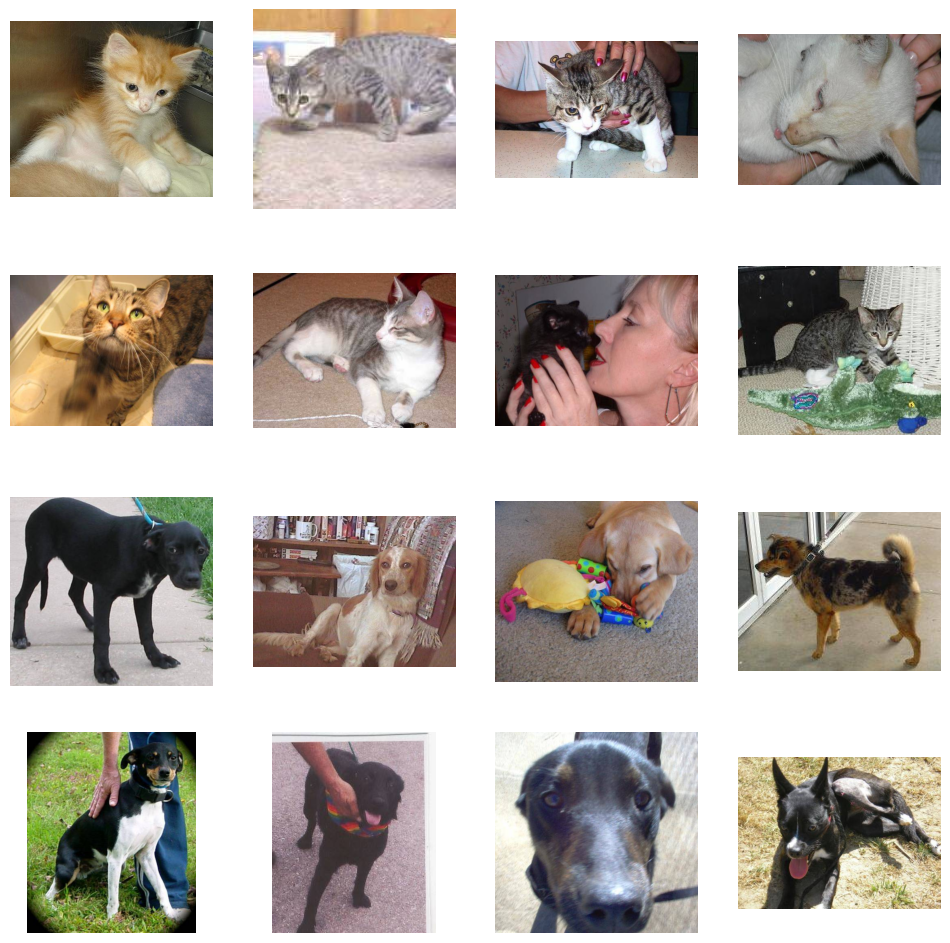

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)for fname in train_cats_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)for fname in train_dogs_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### 데이터 스케일링

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# 이미지 픽셀을 0에서 1사이의 값으로 스케일을 조정한다.

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      target_size=(150,150),
                                                      class_mode = 'binary')

Found 1000 images belonging to 2 classes.


### 모델 구성
- Conv2D, MaxPool2D

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

- binary_crossentropy: 이진분류

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### 모델 학습하기

In [ ]:
def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=get_step(2000, 32),
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
63/63 [==============================] - 15s 63ms/step - loss: 0.6955 - acc: 0.5254 - val_loss: 0.6915 - val_acc: 0.5360
Epoch 2/100
63/63 [==============================] - 4s 60ms/step - loss: 0.6919 - acc: 0.5381 - val_loss: 0.6925 - val_acc: 0.5150
Epoch 3/100
63/63 [==============================] - 4s 61ms/step - loss: 0.6843 - acc: 0.5500 - val_loss: 0.6889 - val_acc: 0.5460
Epoch 4/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6823 - acc: 0.5611 - val_loss: 0.6870 - val_acc: 0.5500
Epoch 5/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6721 - acc: 0.5746 - val_loss: 0.6739 - val_acc: 0.5880
Epoch 6/100
63/63 [==============================] - 4s 69ms/step - loss: 0.6601 - acc: 0.5968 - val_loss: 0.6692 - val_acc: 0.5960
Epoch 7/100
63/63 [==============================] - 4s 61ms/step - loss: 0.6562 - acc: 0.5786 - val_loss: 0.6665 - val_acc: 0.5940
Epoch 8/100
63/63 [==============================] - 4s 70ms/step - loss: 0

## 학습 과정 그려보기

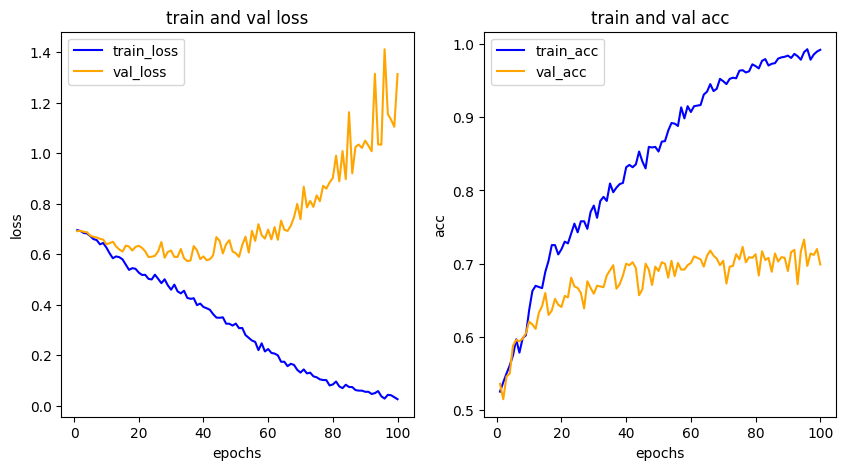

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
import tensorflow as tf

# 모델을 "my_model.h5" 파일에 저장
model.save("my_model_catdog.h5")

# 나중에 모델을 다시 불러올 수 있습니다
loaded_model = tf.keras.models.load_model("my_model_catdog.h5")
loaded_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0